## linear regression with gradient descent

### Theory

the relationship between dependant and independant variables is given by

$\hat{y} = \theta_0 + \theta_1 * x_1 + \theta_2 * x_2 + ... + \theta_n * x_n$  

where 

* $\hat{y}$ is the predicted value
* $n$ is the number of features
* $x_i$ is the ith feature value
* $\theta_j$ is the jth model parameter
* $\theta_0$ is the bias weight while $\theta_1$ to $\theta_n$ are feature weights

in simple linear regression we have only one independant variable x1

#### vectorized / linear algebra form

$\hat{y} = \theta^{T}.x$

where

* $\theta$ is the model parameter vector containing bias term $\theta_0$ and feature weights $\theta_1$ to $\theta_n$
* $\theta^{T}$ is the transpose of parameter vector (row vector instead of column vector)
* $x$ is that instance's feature vector containing $x_0$ to $x_n$ where $x_0$ is always 

#### MSE cost function

$MSE(X) = \frac{1}{m} * \sum_{i=1}^{m}{(\theta^T.x^{(i)} - y^{(i)})}$

where

* $X$ is the entire dataset
* $m$ is the number if instances in the dataset
* $x^{(i)}$ is the feature vector of ith instance in the dataset
* $y^{(i)}$ is the desired output for that instance

#### Normal equation / analytical method

$\hat{\theta} = (X^T.X)^{-1}.X^T.y$

where

* $\hat{\theta}$ is the value of $\theta$ minimizing the cost function

#### gradient descent

for gradient descent we have to calculate partial derivate of cost function wrt each model parameter

$\frac{\partial{MSE(\theta)}}{\partial{\theta_j}} = \frac{2}{m}\sum_{i=1}^{m}{(\theta^T.x^{(i)}-y^{(i)})}x^{(i)}_{j}$

we can calculate gradients of all model parameters wrt cost function in one computation using the equation

$\nabla MSE(\theta) = \frac{2}{m}X^{T}.(X.\theta - y) $

where

* $\nabla MSE(\theta)$ is the gradient vector containing gradients of all model parameters wrt cost function

to calculate next value of parameter vectors

$\theta^{(next step)} = \theta - \eta\nabla MSE(\theta)$ 

where

* $\eta$ is the learning rate

In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [236]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


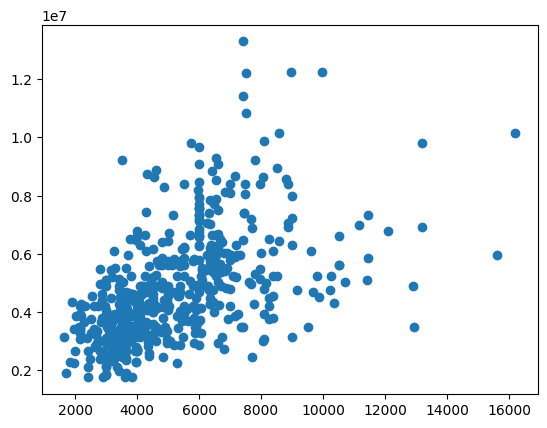

In [237]:
# using linear regression to predict relation between hdl and blood pressure
x_label = 'area'
y_label = 'price'

plt.scatter(df[x_label],df[y_label])

In [238]:
# extracting y
y_series = df[y_label]
y = y_series.to_numpy()

# y as 1d array
print(y[:5])

# converting y into column matrix
y_len = y.size
y = y.reshape(y_len,1)

# y as 2d column matrix
print(y[:5,:])
print(y.shape)

[13300000 12250000 12250000 12215000 11410000]
[[13300000]
 [12250000]
 [12250000]
 [12215000]
 [11410000]]
(545, 1)


In [239]:
# extracting X
x_series = df[x_label]
X = x_series.to_numpy()

# X as 1d array
print(X[:5])

# converting X into column matrix
X_len = X.size
X = X.reshape(X_len,1)

# X as 2d matrix
print(X[:5,:])
print(X.shape)

[7420 8960 9960 7500 7420]
[[7420]
 [8960]
 [9960]
 [7500]
 [7420]]
(545, 1)


In [240]:
# adding 1 to all feature vectors
X_new = np.hstack((np.ones((X_len,1)),X))
X_new[:5,:]

array([[1.00e+00, 7.42e+03],
       [1.00e+00, 8.96e+03],
       [1.00e+00, 9.96e+03],
       [1.00e+00, 7.50e+03],
       [1.00e+00, 7.42e+03]])

In [242]:
# analytical method
# theta_best = np.linalg.inv(X_new.T.dot(X_new)).dot(X_new.T).dot(y)
# print(theta_best)
# y_pred = X_new.dot(theta_best)
# plt.scatter(X,y)
# plt.plot(X,y_pred,color="orange")


In [244]:
# using skitlearn
# from sklearn.linear_model import LinearRegression
# lin_reg = LinearRegression()
# lin_reg.fit(X, y)
# print(lin_reg.intercept_, lin_reg.coef_)
# y_pred = lin_reg.predict(X)
# plt.scatter(X,y) 
# plt.plot(X,y_pred, color='orange')

[[-5.51461979e-01]
 [ 8.54084310e+02]]


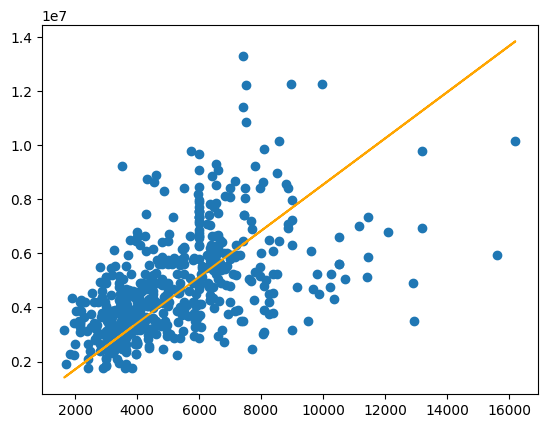

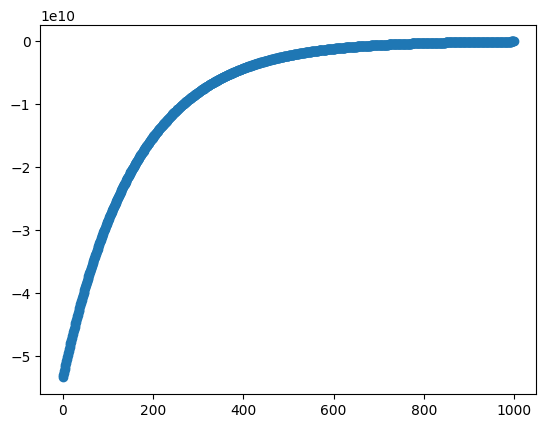

In [246]:
# using gradient descent
# these values of learning rate and iterations are specific to this dataset
# for other datasets try tweaking these values till you get good enough predictions
eta = 0.0000000001
n_iterations = 1000
m = X_len

theta = np.random.randn(2,1)

# for plots
iters = np.zeros((n_iterations,1))
grads = np.zeros((n_iterations, 1))

for iteration in range(n_iterations):
    gradients = 2/m * X_new.T.dot(X_new.dot(theta) - y)
    theta = theta - eta * gradients
    # for plots
    iters[iteration] = np.array([iteration])
    grads[iteration] = np.array([gradients[1,0]])

print(theta)

y_pred = X_new.dot(theta)

plt.scatter(X,y)
plt.plot(X,y_pred, color='orange')
plt.show()

# plot
plt.scatter(iters,grads)
plt.show()